<a href="https://colab.research.google.com/github/Mayandza/Projet/blob/main/Unu16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math
import sqlite3
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df.columns = ['age', 'sexe','cp','trestbps','chol','fbs','restcg','thalach','exang','oldpick','slop','ca','thal','target']

In [ ]:
df.head()

,age,sexe,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpick,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sexe      303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restcg    303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpick   303 non-null    float64
 10  slop      303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
df['target'] = df['target'].replace(to_replace=2, value=1)


In [ ]:
df['target'] = df['target'].replace(to_replace=3, value=1)


In [ ]:
df['target'] = df['target'].replace(to_replace=4, value=1)

In [ ]:
df

,age,sexe,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpick,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
#affectation des types de colonnes (variable qualitative)
df['sexe']= df['sexe'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restcg'] = df['restcg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slop'] = df['slop'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sexe      303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restcg    303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpick   303 non-null    float64 
 10  slop      303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [ ]:
## suppression des valeurs manquantes
df['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: target
Non-Null Count  Dtype   
--------------  -----   
303 non-null    category
dtypes: category(1)
memory usage: 555.0 bytes


In [ ]:
df['target'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
### remplacement des modalités des colonnes
my_mapthal = {3.0 :"absence d'anomalie", 6.0 :'thalossemie sous controme', 7.0 :'thalossemie stablein'}

In [ ]:
df['thal'] = df['thal'].map(my_mapthal)

In [ ]:
my_maptarget = {0:'non', 1:'oui'}

In [ ]:
df['target'] = df['target'].map(my_maptarget)

In [ ]:
my_mapsexe = {0:'femme', 1:'homme'}

In [ ]:
df['sexe'] = df['sexe'].map(my_mapsexe)

In [ ]:
my_mapcp = {1:'angine de poitrine stable', 2:'angine de poitrine instable', 3:'douleur non angineuse',4:'asymptomatique'}

In [ ]:
df['cp'] = df['cp'].map(my_mapcp)

In [ ]:
my_mapfbs = {0:'non', 1:'oui'}

In [ ]:
df['fbs'] = df['fbs'].map(my_mapfbs)

In [ ]:
my_maprestcg = {0:'normal', 1:'anomalie', 2:'hypertrophie'}

In [ ]:
df['restcg'] = df['restcg'].map(my_maprestcg)

In [ ]:
my_mapexang = {0:'non', 1:'oui'}

In [ ]:
df['exang'] = df['exang'].map(my_mapexang)

In [ ]:
my_mapslop = {1:'en hausse', 2:'stable', 3:'en baisse'}

In [ ]:
df['slop'] = df['slop'].map(my_mapslop)

In [ ]:
my_mapca = {0.0:"absence d'anomalie", 1.0:"faible", 2.0:"moyen", 3.0:"eleve"}

In [ ]:
df['ca'] = df['ca'].map(my_mapca)

In [ ]:
df.head(5)

,age,sexe,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpick,slop,ca,thal,target
0,63,homme,angine de poitrine stable,145,233,oui,hypertrophie,150,non,2.3,en baisse,0.0,6.0,non
1,67,homme,asymptomatique,160,286,non,hypertrophie,108,oui,1.5,stable,3.0,3.0,oui
2,67,homme,asymptomatique,120,229,non,hypertrophie,129,oui,2.6,stable,2.0,7.0,oui
3,37,homme,douleur non angineuse,130,250,non,normal,187,non,3.5,en baisse,0.0,3.0,non
4,41,femme,angine de poitrine instable,130,204,non,hypertrophie,172,non,1.4,en hausse,0.0,3.0,non


In [ ]:
df['ca'].unique()

array([nan])

In [ ]:
## calcul de l'effectif, le pourcentage et la fréquence
df['sexe'].value_counts()

homme    206
femme     97
Name: sexe, dtype: int64

In [ ]:
df['cp'].value_counts()

asymptomatique                 144
douleur non angineuse           86
angine de poitrine instable     50
angine de poitrine stable       23
Name: cp, dtype: int64

In [ ]:
df[['sexe','target']].value_counts()

sexe   target
homme  oui       114
       non        92
femme  non        72
       oui        25
dtype: int64

In [ ]:
df[['fbs','sexe']].value_counts(normalize=True).round(4)

fbs  sexe 
non  homme    0.5710
     femme    0.2805
oui  homme    0.1089
     femme    0.0396
dtype: float64

In [ ]:
df[['restcg','target']].value_counts()

restcg        target
normal        non       95
hypertrophie  oui       80
              non       68
normal        oui       56
anomalie      oui        3
              non        1
dtype: int64

In [ ]:
df[['restcg','sexe']].value_counts(normalize=True).round(4)

restcg        sexe 
hypertrophie  homme    0.3399
normal        homme    0.3366
              femme    0.1617
hypertrophie  femme    0.1485
anomalie      femme    0.0099
              homme    0.0033
dtype: float64

In [ ]:
df[['restcg','sexe']].value_counts(normalize=True).round(4)

<Axes: xlabel='trestbps', ylabel='chol'>

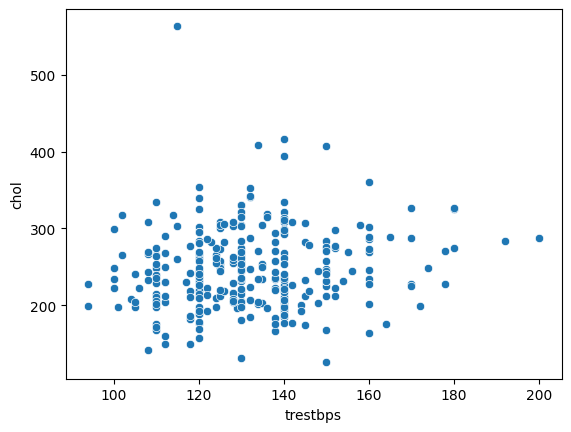

In [ ]:
### La visualisation

sns.scatterplot(df, x='trestbps', y='chol')

<Axes: xlabel='trestbps', ylabel='Count'>

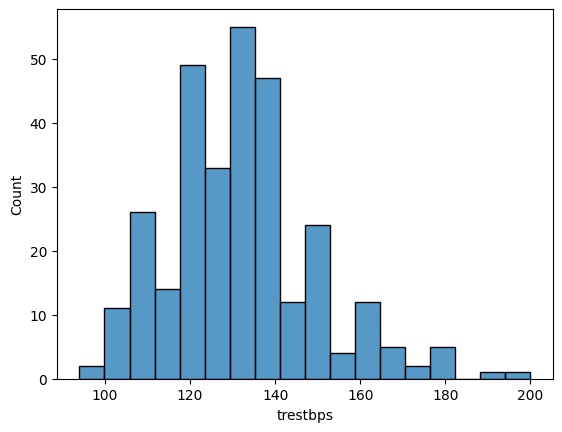

In [ ]:
sns.histplot(df, x='trestbps')

<Axes: xlabel='trestbps', ylabel='target'>

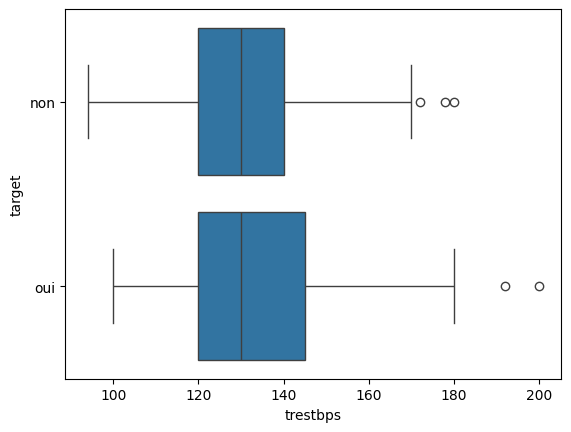

In [ ]:
sns.boxplot(df, x='trestbps',y='target')

<Axes: xlabel='sexe', ylabel='target'>

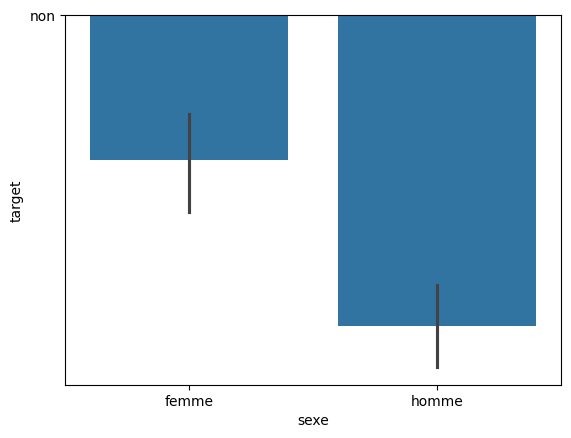

In [ ]:
sns.barplot(df, x='sexe', y='target')

<Axes: xlabel='sexe', ylabel='count'>

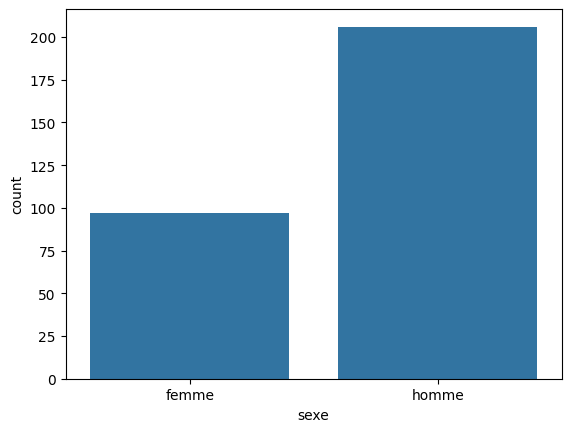

In [ ]:
sns.countplot(df, x="sexe")

<Axes: xlabel='cp', ylabel='count'>

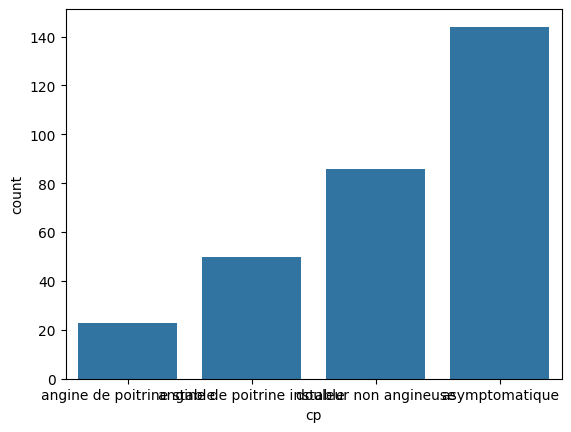

In [ ]:
sns.countplot(df, x="cp")

In [ ]:
# test de khi deux
# Créer une table de contingence entre les deux variables
contingency_table = pd.crosstab(df['sexe'], df['target'])


In [ ]:
# Effectuer le test du khi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [ ]:
# Afficher les résultats du test
print("\nRésultats du test du khi-deux:")
print("Valeur de chi2 :", chi2)
print("p-valeur :", p)
print("Degrés de liberté :", dof)
print("Valeurs attendues :", expected)


Résultats du test du khi-deux:
Valeur de chi2 : 22.042560606155472
p-valeur : 2.666712348180942e-06
Degrés de liberté : 1
Valeurs attendues : [[ 52.50165017  44.49834983]
 [111.49834983  94.50165017]]


In [ ]:
# Effectuer le test de Shapiro-Wilk
statistic, p_value = shapiro(df['trestbps'])

# Afficher les résultats du test
print("Statistique de test :", statistic)
print("P-valeur :", p_value)

# Interpréter les résultats
alpha = 0.05
if p_value > alpha:
    print("Les données semblent provenir d'une distribution normale (ne pas rejeter H0)")
else:
    print("Les données ne semblent pas provenir d'une distribution normale (rejeter H0)")

Statistique de test : 0.9665440917015076
P-valeur : 1.8012971167991054e-06
Les données ne semblent pas provenir d'une distribution normale (rejeter H0)


<Axes: xlabel='trestbps', ylabel='Count'>

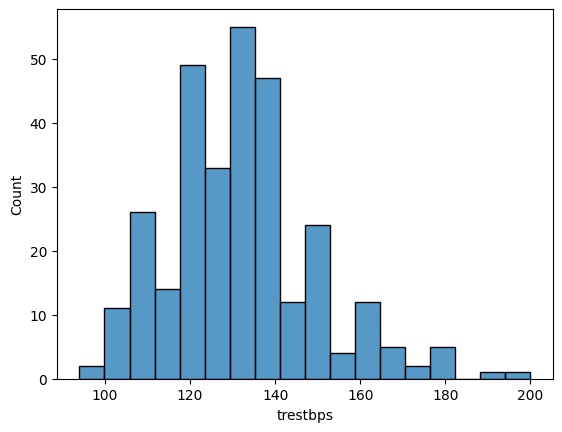

In [ ]:
sns.histplot(df, x='trestbps')

In [ ]:
# test de shapire
statistic, p_value = shapiro(df['trestbps'])

In [ ]:
statistic

0.9665440917015076

In [ ]:
p_value

1.8012971167991054e-06

In [ ]:
statistic, p_value = shapiro(df['chol'])

In [ ]:
p_value

5.910671063702466e-09

In [ ]:
statistic

0.9472531676292419

<Axes: xlabel='chol', ylabel='Count'>

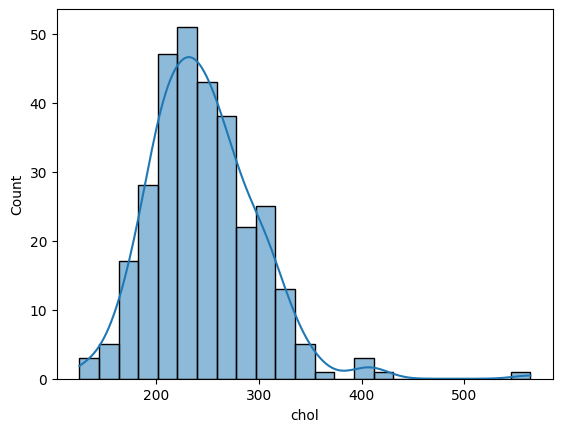

In [ ]:
sns.histplot(df, x='chol', kde=True)